<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

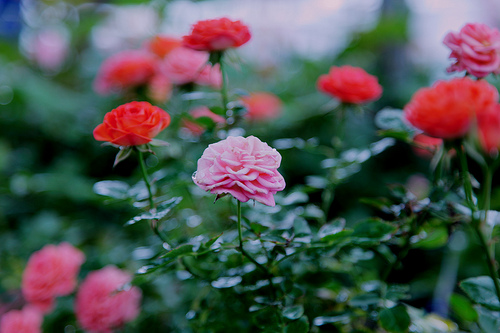

In [8]:
PIL.Image.open(str(roses[1]))

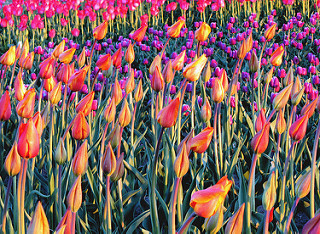

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(243, 500, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

2022-10-29 11:42:42.791020: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-29 11:42:42.791147: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Epoch 1/30


2022-10-29 11:42:43.261442: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-29 11:42:43.601670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 3s 28ms/step - loss: 1.4065 - accuracy: 0.3946
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0264 - accuracy: 0.5890
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8077 - accuracy: 0.6951
Epoch 4/30
86/86 [==============================] - 2s 28ms/step - loss: 0.5778 - accuracy: 0.8001
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.3803 - accuracy: 0.8739
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.2156 - accuracy: 0.9320
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.1149 - accuracy: 0.9673
Epoch 8/30
86/86 [==============================] - 2s 29ms/step - loss: 0.0916 - accuracy: 0.9746
Epoch 9/30
86/86 [==============================] - 2s 28ms/step - loss: 0.0702 - accuracy: 0.9807
Epoch 10/30
86/86 [==============================] - 2s 28ms/step - loss: 0.0349 - accuracy: 0.9920
Epoch 11/30
86/86 [=

In [22]:
model.evaluate(X_test_scaled,y_test)

 9/29 [========>.....................] - ETA: 0s - loss: 3.2761 - accuracy: 0.6354

2022-10-29 11:43:55.832616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 16ms/step - loss: 3.3136 - accuracy: 0.6547


[3.313567638397217, 0.6546840667724609]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [23]:
predictions = model.predict(X_test_scaled)
predictions

12/29 [===========>..................] - ETA: 0s

2022-10-29 11:43:56.545913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 0s 10ms/step


array([[ -4.8340683 ,  16.863012  ,  10.213973  , -13.899489  ,
        -14.670541  ],
       [ 14.446895  ,   2.772571  , -17.374332  ,  -3.1681623 ,
          0.09471377],
       [ 11.369399  , -12.944272  ,  15.132665  ,   8.024786  ,
         -5.748606  ],
       ...,
       [ -7.2764597 ,  -0.33684343,  -0.64775884,   7.1583943 ,
         -0.6443438 ],
       [  5.3799906 ,  -2.3825314 ,  -5.4484887 ,  -5.857879  ,
          0.1822345 ],
       [ -7.8304977 , -11.361415  ,  -0.58011556,  37.847076  ,
         -3.164545  ]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [27]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Original Image**

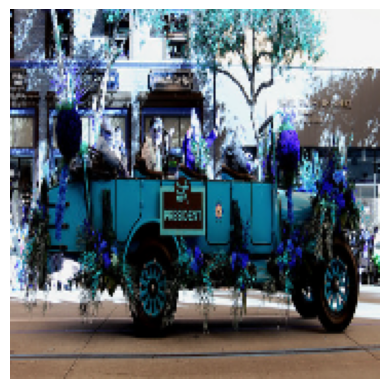

In [28]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

In [29]:
#plt.axis('off')
#plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30


2022-10-29 11:44:00.666444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 28s 276ms/step - loss: 1.3683 - accuracy: 0.4262
Epoch 2/30
86/86 [==============================] - 24s 280ms/step - loss: 1.0771 - accuracy: 0.5810
Epoch 3/30
86/86 [==============================] - 23s 272ms/step - loss: 0.9564 - accuracy: 0.6225
Epoch 4/30
86/86 [==============================] - 23s 270ms/step - loss: 0.8855 - accuracy: 0.6639
Epoch 5/30
86/86 [==============================] - 24s 279ms/step - loss: 0.8234 - accuracy: 0.6962
Epoch 6/30
86/86 [==============================] - 25s 290ms/step - loss: 0.7671 - accuracy: 0.7177
Epoch 7/30
86/86 [==============================] - 25s 290ms/step - loss: 0.7117 - accuracy: 0.7362
Epoch 8/30
86/86 [==============================] - 25s 290ms/step - loss: 0.6595 - accuracy: 0.7544
Epoch 9/30
86/86 [==============================] - 26s 300ms/step - loss: 0.6264 - accuracy: 0.7587
Epoch 10/30
86/86 [==============================] - 25s 295ms/step - loss: 0.5884 - accuracy: 0.7809


In [31]:
model.evaluate(X_test_scaled,y_test)

 4/29 [===>..........................] - ETA: 0s - loss: 1.0124 - accuracy: 0.7812

2022-10-29 11:57:30.306568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 19ms/step - loss: 1.1927 - accuracy: 0.7222


[1.1926579475402832, 0.7222222089767456]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**